# STEP 4

## VGGFace model

### Import model

In [1]:
from keras_vggface.vggface import VGGFace
import numpy as np
import tensorflow as tf

fpath = tf.keras.utils.get_file('rcmalli_vggface_labels_v2.npy',
                             "https://github.com/rcmalli/keras-vggface/releases/download/v2.0/rcmalli_vggface_labels_v2.npy",
                             cache_subdir="./")
LABELS = np.load(fpath)

model = VGGFace(model='resnet50')

### Evaluation of the model 

In [2]:
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions
from PIL import Image
import numpy as np
import os
import cv2

base_directory = "1000Campioni"
labels = {}
with open ("new_class_name.csv", "r") as file:
    for line in file:
        key = line.split(",")[0].strip()
        value = line.split(",")[1].strip()
        if value.startswith("\""):
            value = value[1:]
        if value.endswith("\""):
            value = value[:-1]
        labels[key] = value

In [ ]:
total = 0
correct_predictions = 0

dataset = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            image = cv2.imread(image_path)

            # Convert the image to gray scale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Load OpenCV face detector
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

            # Detect faces
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)

            # Cut out the first face found
            for (x,y,w,h) in faces:
                face = image[y:y+h, x:x+w]
                break

            # Convert the face to PIL Image and resize it
            face_image = Image.fromarray(face)
            face_image = face_image.resize((224, 224))

            # Convert the image to a numpy array
            x = np.array(face_image, 'float32')
            x = np.expand_dims(x, axis=0)

            # Preprocess the input
            x = preprocess_input(x, version=2)
            
            # Get the prediction
            preds = model.predict(x)

            label = LABELS[ preds.argmax().item()]
            
            class_id = image_path.split("\\")[1]
            
            total += 1
            if " "+labels[class_id] == label:
                correct_predictions +=1
print("Accuracy: ", correct_predictions/total * 100, "%") 

# STEP 5

## Transferability

### Evaluate the tranferibility of the attack performed on NN1

In [3]:
def evaluate_untargeted_attack(dataset):
    # Load OpenCV face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    acc = []
    for val in os.listdir(dataset):
        val_dir = os.path.join(dataset, val)
        total = 0
        correct_predictions = 0
        for p in os.listdir(val_dir):
            p_dir = os.path.join(val_dir, p)
            for img in os.listdir(p_dir):
                if img.endswith(".jpg"):

                    image_path = os.path.join(p_dir, img)
            
                    # Load the images
                    image = cv2.imread(image_path)
                    
                    # Preprocess the images
                    # Convert the image to gray scale
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Detect faces
                    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

                    # Cut out the first face found
                    for (x,y,w,h) in faces:
                        face = image[y:y+h, x:x+w]
                        break

                    # Convert the face to PIL Image and resize it
                    face_image = Image.fromarray(face)
                    face_image = face_image.resize((224, 224))

                    # Convert the image to a numpy array
                    x = np.array(face_image, 'float32')
                    x = np.expand_dims(x, axis=0)

                    # Preprocess the input
                    x = preprocess_input(x, version=2)
                    
                    # Get the prediction
                    preds = model.predict(x)
                    label = LABELS[ preds.argmax().item()]
                    
                    #Save the actual class id
                    class_id = p
                    
                    total += 1
                    if " "+labels[class_id] == label:
                        correct_predictions +=1
        print("Accuracy: ", correct_predictions/total * 100, "%", "for class: ", val)
        acc.append(correct_predictions/total)
    return acc



def evaluate_targeted_attack(dataset, target):
    # Load OpenCV face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    #Accuracies values
    acc = []

    for val in os.listdir(dataset):
        val_dir = os.path.join(dataset, val)

        total = 0
        correct_predictions = 0

        for p in os.listdir(val_dir):
            p_dir = os.path.join(val_dir, p)

            for img in os.listdir(p_dir):
                if img.endswith(".jpg"):

                    image_path = os.path.join(p_dir, img)
            
                    # Load the images
                    image = cv2.imread(image_path)
                    
                    # Preprocess the images
                    # Convert the image to gray scale
                    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                    # Detect faces
                    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

                    # Cut out the first face found
                    for (x,y,w,h) in faces:
                        face = image[y:y+h, x:x+w]
                        break

                    # Convert the face to PIL Image and resize it
                    face_image = Image.fromarray(face)
                    face_image = face_image.resize((224, 224))

                    # Convert the image to a numpy array
                    x = np.array(face_image, 'float32')
                    x = np.expand_dims(x, axis=0)

                    # Preprocess the input
                    x = preprocess_input(x, version=2)
                    
                    # Get the prediction
                    preds = model.predict(x)
                    label = LABELS[ preds.argmax().item()]
                    
                    
                    
                    total += 1
                    if " "+target == label:
                        correct_predictions +=1
        print("Accuracy: ", correct_predictions/total * 100, "%", "for class: ", val)
        acc.append(correct_predictions/total)
    return acc

### Transferibility of untargeted FGSM

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NFGSM = evaluate_untargeted_attack("adv\\NFGSM")

In [ ]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_NFGSM)

# Save the NumPy array to a file
np.save("nn2_accuracy_NFGSM.npy", accuracy_array)

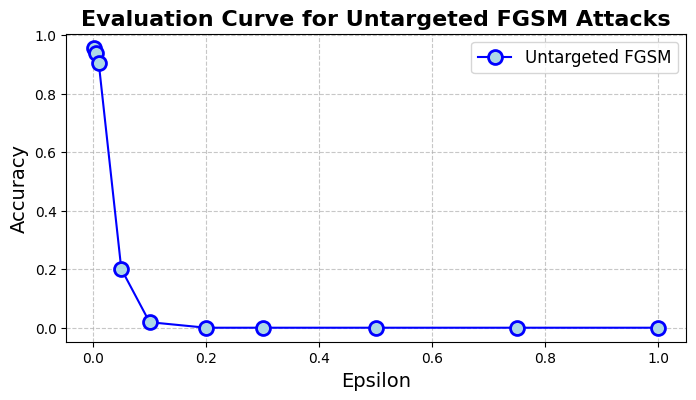

In [5]:
accuracy_NFGSM = np.load("nn2_accuracy_NFGSM.npy")

#Accuracy curve for untargeted FGSM
plt.figure(figsize=(8, 4))
eps_values_NFGSM = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the untargeted FGSM attack
plt.plot(eps_values_NFGSM, accuracy_NFGSM, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Untargeted FGSM")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Untargeted FGSM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of targeted FGSM

In [5]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_TFGSM = evaluate_targeted_attack("adv\\TFGSM", "Brad_Pitt")

In [7]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_TFGSM)

# Save the NumPy array to a file
np.save("nn2_accuracy_TFGSM.npy", accuracy_array)

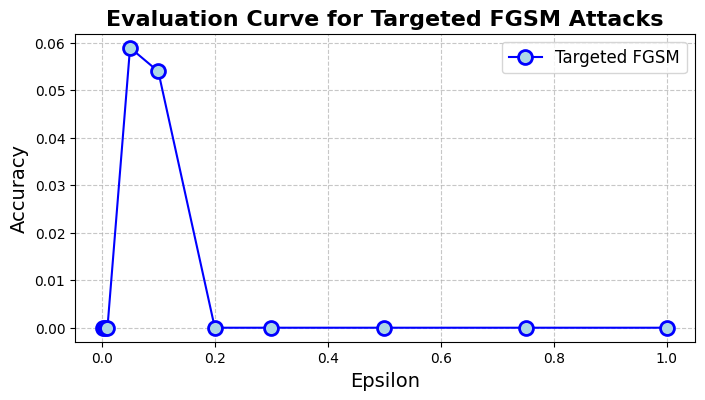

In [8]:
accuracy_TFGSM = np.load("nn2_accuracy_TFGSM.npy")
#Accuracy curve for untargeted FGSM
plt.figure(figsize=(8, 4))
eps_values_TFGSM = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the targeted FGSM attack
plt.plot(eps_values_TFGSM, accuracy_TFGSM, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted FGSM")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted FGSM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of untargeted BIM

#### Epsilon

In [12]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NBIMEp = evaluate_untargeted_attack("adv\\NBIM\\Epsilon")

In [ ]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_NBIMEp)

# Save the NumPy array to a file
np.save("nn2_accuracy_NBIMEp.npy", accuracy_array)

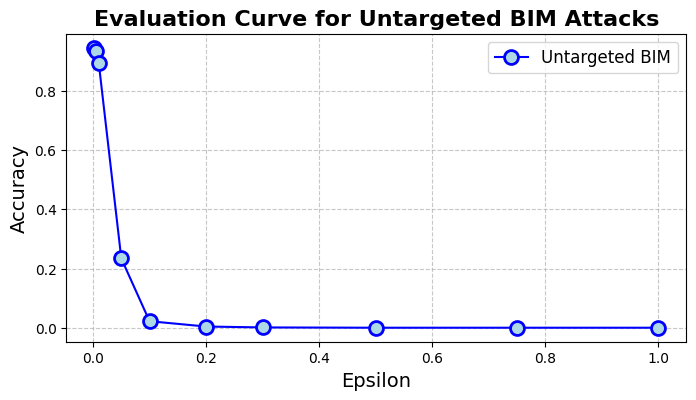

In [13]:
accuracy_NBIMEp = np.load("nn2_accuracy_NBIMEp.npy")
#Accuracy curve for untargeted BIM with different epsilons
plt.figure(figsize=(8, 4))
bim_eps_values = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the untargeted BIM attack
plt.plot(bim_eps_values, accuracy_NBIMEp, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Untargeted BIM")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Untargeted BIM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Step

In [14]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NBIMStep = evaluate_untargeted_attack("adv\\NBIM\\Step")

In [16]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_NBIMStep)

# Save the NumPy array to a file
np.save("nn2_accuracy_NBIMStep.npy", accuracy_array)

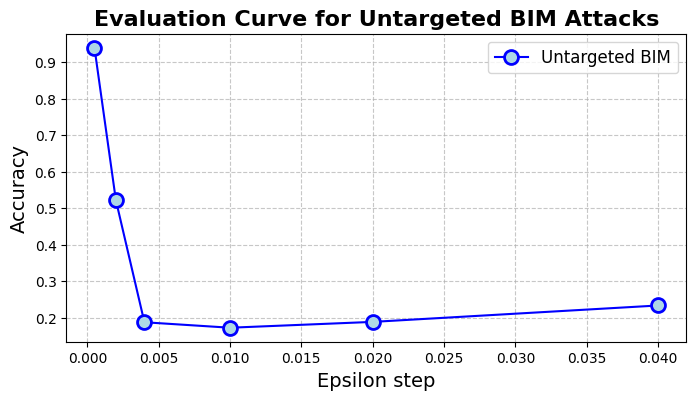

In [17]:
accuracy_NBIMS = np.load("nn2_accuracy_NBIMStep.npy")
#Accuracy curve for targeted BIM with different epsilon_steps
plt.figure(figsize=(8, 4))
epsilon_step = [0.0005, 0.002, 0.004, 0.01, 0.02, 0.04]
# Drawing the evaluation curve for the targeted BIM attack
plt.plot(epsilon_step, accuracy_NBIMS, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Untargeted BIM")

# Visualization settings
plt.xlabel('Epsilon step', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Untargeted BIM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Iter

In [19]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NBIMMi = evaluate_untargeted_attack("adv\\NBIM\\Iter")

In [22]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_NBIMMi)

# Save the NumPy array to a file
np.save("nn2_accuracy_NBIMMi.npy", accuracy_array)

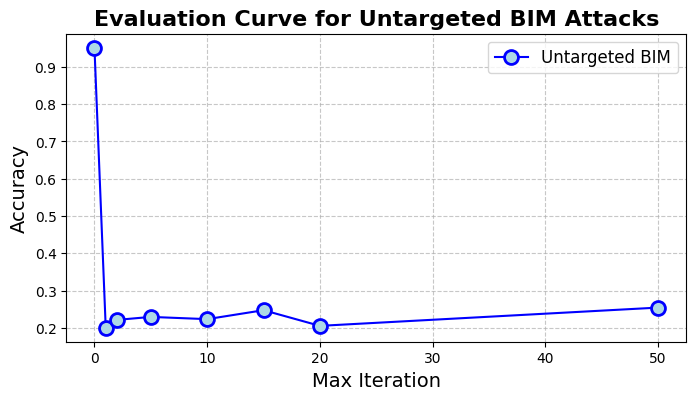

In [24]:
accuracy_NBIMMi = np.load("nn2_accuracy_NBIMMi.npy")

#Accuracy curve for untargeted BIM with different max_iterations
plt.figure(figsize=(8, 4))
max_iter = [0, 1, 2, 5, 10, 15, 20, 50]
# Drawing the evaluation curve for the untargeted BIM attack
plt.plot(max_iter, accuracy_NBIMMi, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Untargeted BIM")

# Visualization settings
plt.xlabel('Max Iteration', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Untargeted BIM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of targeted BIM

#### Epsilon

In [6]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_TBIMEp = evaluate_targeted_attack("adv\\TBIM\\Epsilon", "Brad_Pitt")

In [28]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_TBIMEp)

# Save the NumPy array to a file
np.save("AccuracyNN2/nn2_accuracy_TBIMEp.npy", accuracy_array)

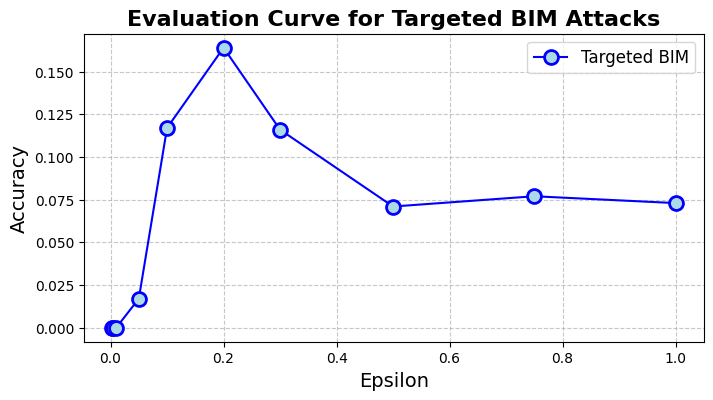

In [30]:
accuracy_TBIMEp = np.load("AccuracyNN2/nn2_accuracy_TBIMEp.npy")
#Accuracy curve for targeted BIM with different epsilons
plt.figure(figsize=(8, 4))
bim_eps_values = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the targeted BIM attack
plt.plot(bim_eps_values, accuracy_TBIMEp, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted BIM")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted BIM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Step

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_TBIMSt = evaluate_targeted_attack("adv\\TBIM\\Step", "Brad_Pitt")

In [8]:
# Convert the accuracy list to a NumPy array
accuracy_array = np.array(accuracy_TBIMSt)

# Save the NumPy array to a file
np.save("nn2_accuracy_TBIMSt.npy", accuracy_array)

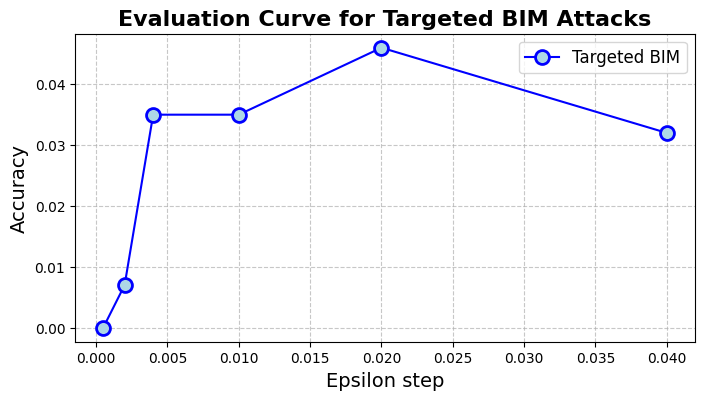

In [10]:
accuracy_TBIMSt = np.load("nn2_accuracy_TBIMSt.npy")
#Accuracy curve for targeted BIM with different epsilon_steps
plt.figure(figsize=(8, 4))
epsilon_step = [0.0005, 0.002, 0.004, 0.01, 0.02, 0.04]
# Drawing the evaluation curve for the targeted BIM attack
plt.plot(epsilon_step, accuracy_TBIMSt, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted BIM")

# Visualization settings
plt.xlabel('Epsilon step', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted BIM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Iter

In [11]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_TBIMMi = evaluate_targeted_attack("adv\\TBIM\\Iter", "Brad_Pitt")

In [32]:
accuracy_array = np.array(accuracy_TBIMMi)

np.save("nn2_accuracy_TBIMMi.npy", accuracy_array)

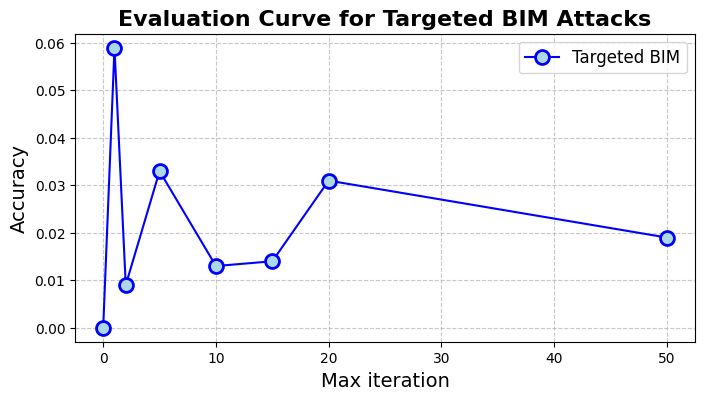

In [33]:
accuracy_TBIMMi = np.load("nn2_accuracy_TBIMMi.npy")
#Accuracy curve for targeted BIM with different max_iterations
plt.figure(figsize=(8, 4))
max_iter = [0, 1, 2, 5, 10, 15, 20, 50]
# Drawing the evaluation curve for the targeted BIM attack
plt.plot(max_iter, accuracy_TBIMMi, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted BIM")

# Visualization settings
plt.xlabel('Max iteration', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted BIM Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of untargeted Carlini Wagner

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NCL2 = evaluate_untargeted_attack("adv\\NCL2")

In [35]:
accuracy_array = np.array(accuracy_NCL2)

np.save("nn2_accuracy_NCL2.npy", accuracy_array)

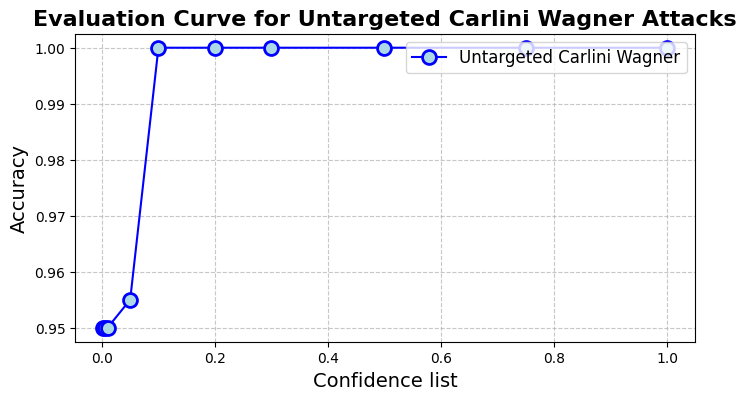

In [36]:
accuracy_NCL2 = np.load("nn2_accuracy_NCL2.npy")
#Accuracy curve for untargeted Crlini Wagner L2
plt.figure(figsize=(8, 4))
confidence_list = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the targeted CW attack
plt.plot(confidence_list, accuracy_NCL2, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Untargeted Carlini Wagner")

# Visualization settings
plt.xlabel('Confidence list', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Untargeted Carlini Wagner Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of targeted Carlini Wagner

In [ ]:
accuracy_TCL2 = evaluate_targeted_attack("adv\\TCL2", "Brad_Pitt")

In [5]:
from matplotlib import pyplot as plt
import numpy as np

In [6]:
accuracy_array = np.array(accuracy_TCL2)

np.save("nn2_accuracy_TCL2.npy", accuracy_array)

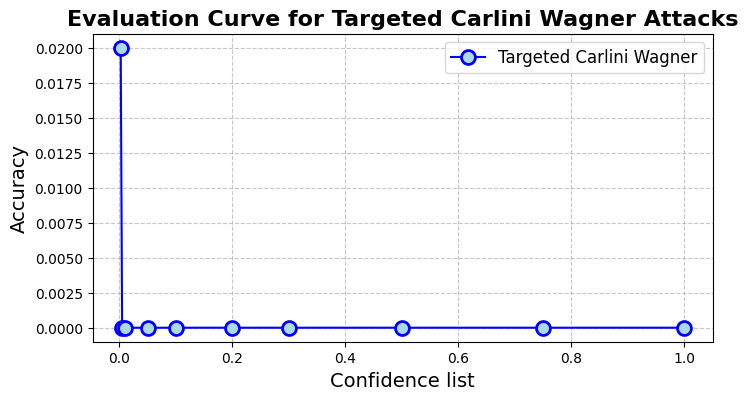

In [7]:
accuracy_TL2 = np.load("nn2_accuracy_TCL2.npy")

#Accuracy curve for targeted Crlini Wagner L2
plt.figure(figsize=(8, 4))
confidence_list = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the targeted CW attack
plt.plot(confidence_list, accuracy_TCL2, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted Carlini Wagner")

# Visualization settings
plt.xlabel('Confidence list', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted Carlini Wagner Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of DeepFool

In [16]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_DF = evaluate_untargeted_attack("adv\\NDF")

In [18]:
accuracy_array = np.array(accuracy_DF)

np.save("nn2_accuracy_DF.npy", accuracy_array)

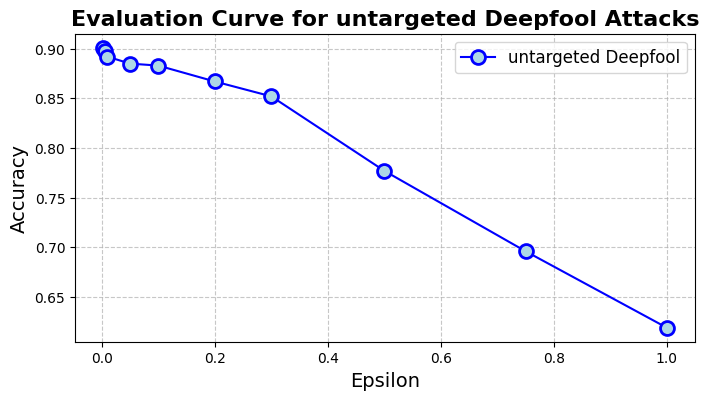

In [19]:
accuracy_DF = np.load("nn2_accuracy_DF.npy")
#Accuracy curve for untargeted DeepFool
plt.figure(figsize=(8, 4))
eps_values_NDF = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the targeted DF attack
plt.plot(eps_values_NDF, accuracy_DF, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="untargeted Deepfool")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for untargeted Deepfool Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of untargeted PGD

#### Epsilon

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NPGDEp = evaluate_untargeted_attack("adv\\NPGD\\Epsilon")

In [21]:
accuracy_array = np.array(accuracy_NPGDEp)

np.save("nn2_accuracy_NPGDEp.npy", accuracy_array)

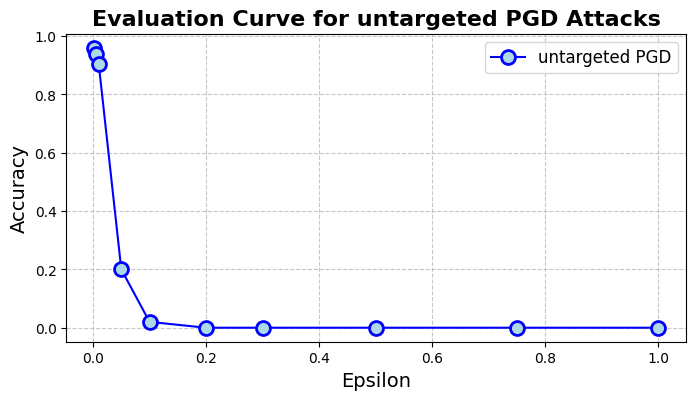

In [22]:
#Accuracy curve for untargeted PGD with different epsilons
plt.figure(figsize=(8, 4))
epsilon_list = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the untargeted PGD attack
plt.plot(epsilon_list, accuracy_NPGDEp, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="untargeted PGD")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for untargeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Step

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NPGDSt = evaluate_untargeted_attack("adv\\NPGD\\Step")

In [39]:
accuracy_array = np.array(accuracy_NPGDSt)

np.save("nn2_accuracy_NPGDSt.npy", accuracy_array)

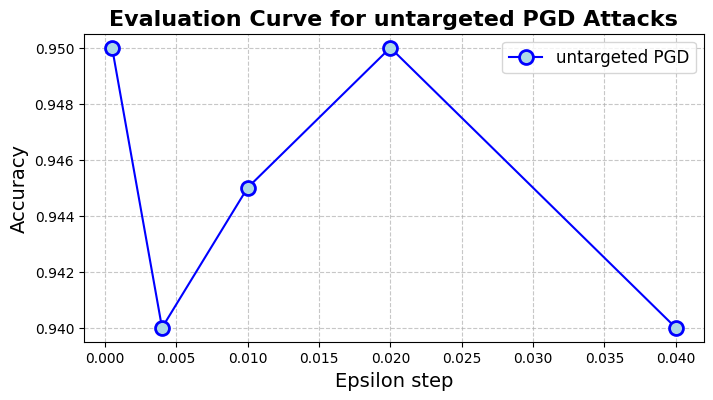

In [40]:
#Accuracy curve for targeted PGD with different epsilon_steps
plt.figure(figsize=(8, 4))
epsilon_step_list = [0.0005, 0.004, 0.01, 0.02, 0.04]
# Drawing the evaluation curve for the untargeted PGD attack
plt.plot(epsilon_step_list, accuracy_NPGDSt, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="untargeted PGD")

# Visualization settings
plt.xlabel('Epsilon step', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for untargeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Iter

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NPGDMi = evaluate_untargeted_attack("adv\\NPGD\\Iter")

In [6]:
accuracy_array = np.array(accuracy_NPGDMi)

np.save("nn2_accuracy_NPGDMi.npy", accuracy_array)

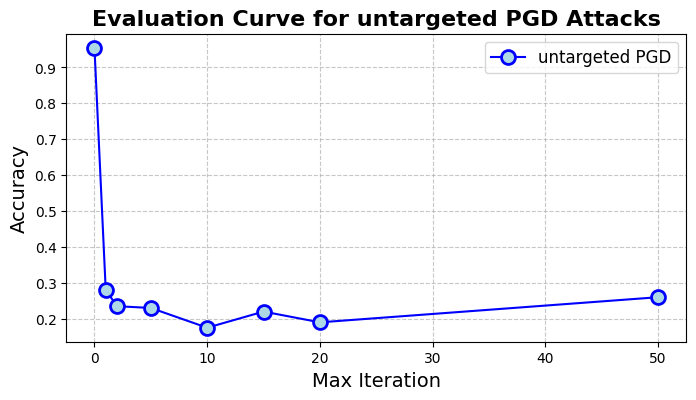

In [8]:
accuracy_NPGDMi = np.load("nn2_accuracy_NPGDMi.npy")
#Accuracy curve for untargeted PGD with different max_iterations
plt.figure(figsize=(8, 4))
max_iter = [0, 1, 2, 5, 10, 15, 20, 50]
# Drawing the evaluation curve for the untargeted PGD attack
plt.plot(max_iter, accuracy_NPGDMi, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="untargeted PGD")

# Visualization settings
plt.xlabel('Max Iteration', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for untargeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Random Init

In [ ]:
accuracy_NPGDN = evaluate_untargeted_attack("adv\\NPGD\\Num")

In [10]:
from matplotlib import pyplot as plt
import numpy as np

In [11]:
accuracy_array = np.array(accuracy_NPGDN)

np.save("nn2_accuracy_NPGDN.npy", accuracy_array)

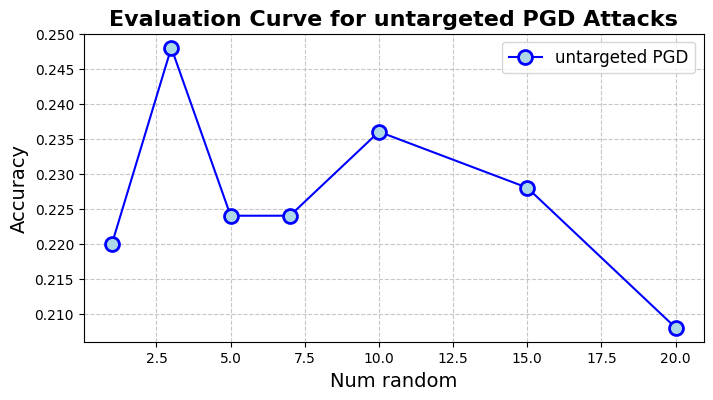

In [12]:
accuracy_NPGDN = np.load("nn2_accuracy_NPGDN.npy")
#Accuracy curve for untargeted PGD with different random initialization
plt.figure(figsize=(8, 4))
num_random_init = [1,3,5,7,10,15,20]
# Drawing the evaluation curve for the untargeted PGD attack
plt.plot(num_random_init, accuracy_NPGDN, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="untargeted PGD")

# Visualization settings
plt.xlabel('Num random', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for untargeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Transferibility of targeted PGD

#### Epsilon

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NPGDEp = evaluate_targeted_attack("adv\\TPGD\\Epsilon", "Brad_Pitt")

In [25]:
accuracy_array = np.array(accuracy_NPGDEp)

np.save("nn2_accuracy_TPGDEp.npy", accuracy_array)

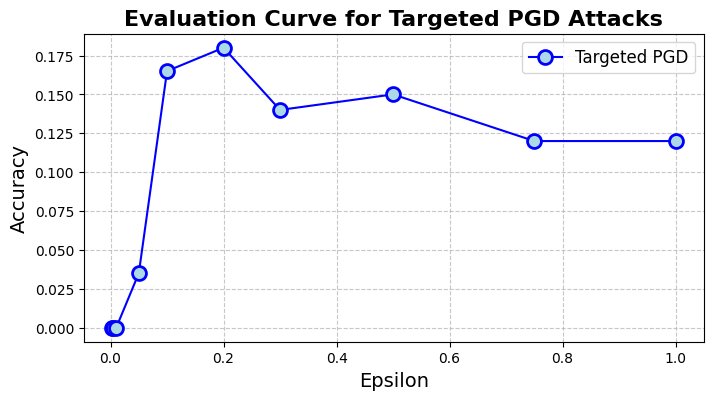

In [26]:
#Accuracy curve for targeted PGD with different epsilons
plt.figure(figsize=(8, 4))
epsilon_list = [0.0025, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1]
# Drawing the evaluation curve for the targeted PGD attack
plt.plot(epsilon_list, accuracy_NPGDEp, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted PGD")

# Visualization settings
plt.xlabel('Epsilon', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Step

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
accuracy_NPGDSt = evaluate_targeted_attack("adv\\TPGD\\Step", "Brad_Pitt")

In [23]:
accuracy_array = np.array(accuracy_NPGDSt)

np.save("nn2_accuracy_TPGDSt.npy", accuracy_array)

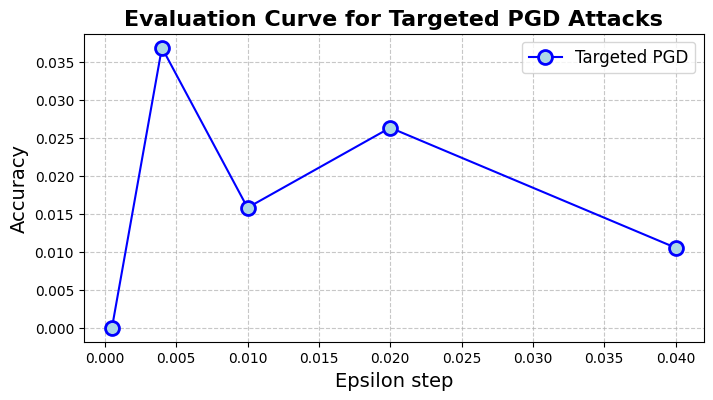

In [25]:
#Accuracy curve for targeted PGD with different epsilon_steps
plt.figure(figsize=(8, 4))
epsilon_step_list = [0.0005,  0.004, 0.01, 0.02, 0.04]
# Drawing the evaluation curve for the targeted PGD attack
plt.plot(epsilon_step_list, accuracy_NPGDSt, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted PGD")

# Visualization settings
plt.xlabel('Epsilon step', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Iter

In [ ]:
accuracy_NPGDMi = evaluate_targeted_attack("adv\\TPGD\\Iter", "Brad_Pitt")

In [14]:
from matplotlib import pyplot as plt
import numpy as np

In [15]:
accuracy_array = np.array(accuracy_NPGDMi)

np.save("nn2_accuracy_TPGDMi.npy", accuracy_array)

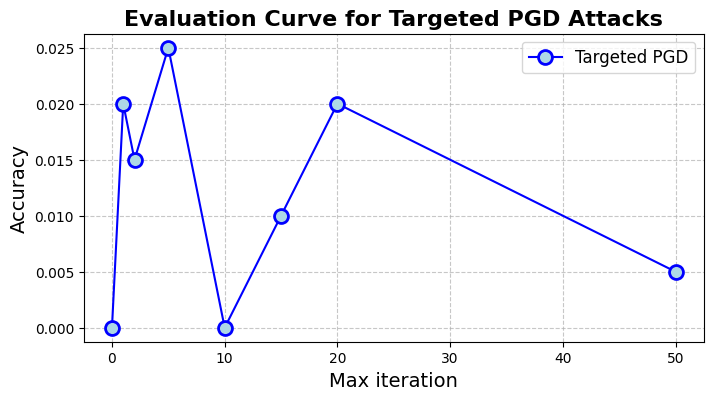

In [17]:
accuracy_NPGDMi = np.load("nn2_accuracy_TPGDMi.npy")
#Accuracy curve for targeted PGD with different max_iterations
plt.figure(figsize=(8, 4))
max_iter = [0, 1, 2, 5, 10, 15, 20, 50]
# Drawing the evaluation curve for the targeted PGD attack
plt.plot(max_iter, accuracy_NPGDMi, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted PGD")

# Visualization settings
plt.xlabel('Max iteration', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

#### Random Init

In [ ]:
accuracy_TPGDN = evaluate_targeted_attack("adv\\TPGD\\Num", "Brad_Pitt")

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [20]:
accuracy_array = np.array(accuracy_TPGDN)

np.save("nn2_accuracy_TPGDN.npy", accuracy_array)

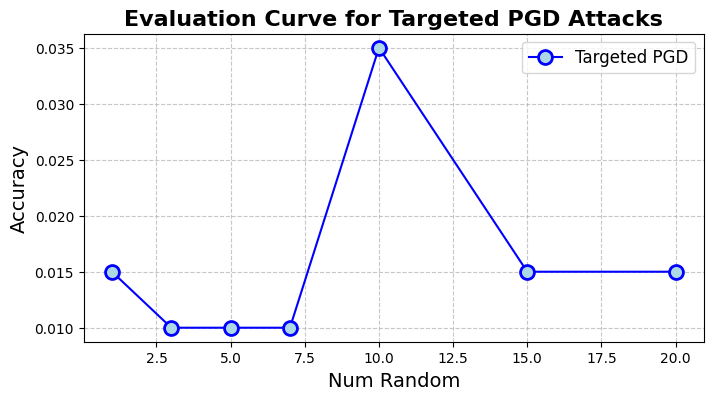

In [21]:
accuracy_TPGDN = np.load("nn2_accuracy_TPGDN.npy")

#Accuracy curve for targeted PGD with different random initialization
plt.figure(figsize=(8, 4))
num_random_init_list = [1,3,5,7,10,15,20]
# Drawing the evaluation curve for the targeted PGD attack
plt.plot(num_random_init_list, accuracy_TPGDN, marker='o', markersize=10, markeredgewidth=2, markerfacecolor='lightblue', markeredgecolor='blue', color='blue', label="Targeted PGD")

# Visualization settings
plt.xlabel('Num Random', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Evaluation Curve for Targeted PGD Attacks', fontsize=16, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()